In [1]:
#Import Modules
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#CSV - read and load
CityPath = "data/city_data.csv"
RidePath = "data/ride_data.csv"

CityData = pd.read_csv(CityPath)
RideData = pd.read_csv(RidePath)

#Load files into one DF
Data = pd.merge(RideData, CityData, on="city", how="left")
Data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#Average fare per city
AvgFare = Data.groupby("city")["fare"].mean()
AvgFare = pd.DataFrame(AvgFare)
AvgFare.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [18]:
#Total number of rides per city *Sorted to busiest city
TotalRides = Data.groupby("city")["ride_id"].count()
TotalRides = pd.DataFrame(TotalRides)
TotalRides.sort_values("ride_id", ascending = False, inplace = True)
TotalRides.head()

,ride_id
city,
West Angela,39
South Karenland,38
North Jason,35
Liumouth,33
Port Frank,33


In [19]:
#Total number of drivers per city *Sorted by driver count
TotalDrivers = Data[["city", "driver_count"]].drop_duplicates("city")
TotalDrivers.sort_values("driver_count", ascending = False, inplace = True)
TotalDrivers.head()

,city,driver_count
25,West Samuelburgh,73
1,South Michelleport,72
18,West Anthony,70
98,Liumouth,69
41,Reynoldsfurt,67


In [32]:
#City type(Urban, Suburban or Rural) *Also counted each type
CityType = Data[["city", "type",]].drop_duplicates("city")
#CityType["type"].value_counts()
CityType.head()

,city,type
0,Lake Jonathanshire,Urban
1,South Michelleport,Urban
2,Port Samanthamouth,Urban
3,Rodneyfort,Urban
4,South Jack,Urban


In [34]:
#Combine dataframes
CombinedData = pd.merge(AvgFare, TotalRides, how = "outer", on = "city")
CombinedData = pd.merge(CombinedData, TotalDrivers, how = "outer", on = "city")
CombinedData = pd.merge(CombinedData, CityType, how = "outer", on = "city")
CombinedData = CombinedData.set_index("city")
CombinedData.head()

,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [36]:
#Create dataframes by type
Urban = CombinedData[CombinedData["type"] == "Urban"]
Suburban = CombinedData[CombinedData["type"] == "Suburban"]
Rural = CombinedData[CombinedData["type"] == "Rural"]
Rural.head()

,fare,ride_id,driver_count,type
city,,,,
Bradshawfurt,40.064000,10,7,Rural
Garzaport,24.123333,3,7,Rural
Harringtonfort,33.470000,6,4,Rural
Jessicaport,36.013333,6,1,Rural
Lake Jamie,34.358333,6,4,Rural


<function matplotlib.pyplot.show(*args, **kw)>

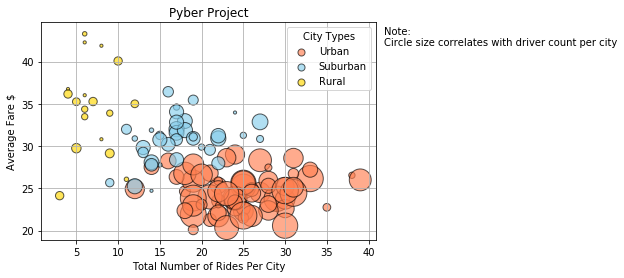

In [47]:
#Bubble plot
#Starting with the coordinates per city type
XUrban = Urban["ride_id"]
YUrban = Urban["fare"]
ZUrban = Urban["driver_count"]
#ZUrban.head()

XSub = Suburban["ride_id"]
YSub = Suburban["fare"]
ZSub = Suburban["driver_count"]
#ZSub.head()

XRural = Rural["ride_id"]
YRural = Rural["fare"]
ZRural = Rural["driver_count"]
#ZRural.head()

Plot1 = plt.scatter(XUrban, YUrban, s = 10*ZUrban, label = "Urban", c="coral", alpha = 0.65, edgecolor = "black", linewidths = 1)
Plot2 = plt.scatter(XSub, YSub, s = 10*ZSub, label = "Suburban", c="skyblue", alpha = 0.65, edgecolor = "black", linewidths = 1)
Plot3 = plt.scatter(XRural, YRural, s = 10*ZRural, label = "Rural", c="gold", alpha = 0.65, edgecolor = "black", linewidths = 1)

plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare $")
plt.title("Pyber Project")

legend = plt.legend(title = "City Types")
legend.legendHandles[0]._sizes =[50]
legend.legendHandles[1]._sizes =[50]
legend.legendHandles[2]._sizes =[50]
plt.grid(True)

plt.figtext(0.92, 0.8, r"Note:" "\n" r"Circle size correlates with driver count per city")

plt.savefig("PyberBubblePlot")

plt.show


In [ ]:
#Easy to see here that Urban city types are by far leading in amount of rides and drivers.

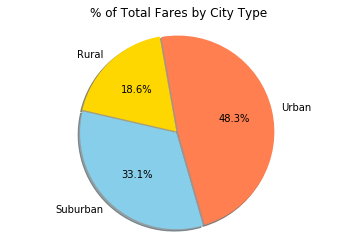

In [59]:
#Total fares by city type pie chart
TypePerc = CombinedData.groupby(["type"])
TotalFares = TypePerc["fare"].sum()

labels = ["Rural", "Suburban", "Urban"]
explode = (0.01, 0.01, 0.01)
colors = ["gold", "skyblue", "coral"]
plt.pie(TotalFares, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle =100)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.savefig("TotalFaresbyCityPiechart")

plt.show()



In [ ]:
#Although Rural type cities have less amount or drivers and less total rides their fare is about a fifth of total fares. 

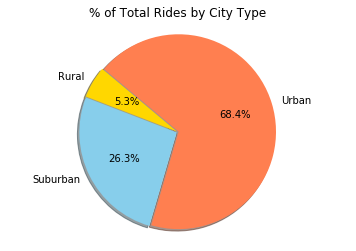

In [60]:
#Total rides by city type
TotalRides = TypePerc["ride_id"].sum()

labels = ["Rural", "Suburban", "Urban"]
explode = (0.01, 0.01, 0.01)
colors = ["gold", "skyblue", "coral"]
plt.pie(TotalRides, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.savefig("TotalRidesbyCityType")

plt.show()



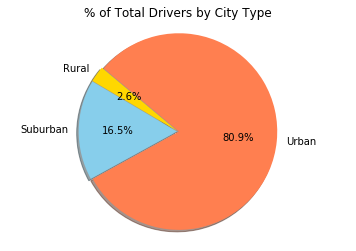

In [61]:
#Total drivers by city type
TotalDrvrs = TypePerc["driver_count"].sum()

labels = ["Rural", "Suburban", "Urban"]
explode = (0.01, 0.01, 0.01)
colors = ["gold", "skyblue", "coral"]
plt.pie(TotalDrvrs, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.savefig("TotalDriversbyCityType")

plt.show()

In [ ]:
#Comparing all charts, its interesting to see that although Urban drivers make up 
#the majority of total drivers, their fares dont even make up half the total fares. 